1- Import Library

In [1]:
import numpy as np #allow efficient mathematical operations on arrays.Used for numerical computations, linear algebra, and data manipulation.
import pandas as pd #provides data structures (Series and DataFrame) for handling and analyzing tabular data
import os
import matplotlib.pyplot as plt # for creating visualizations
import glob #Used for batch processing files with similar names or extensions
import nibabel as nib #neuroscience and medical imaging research.
import cv2 #rovides functions for image manipulation, feature extraction, and object detection
import imageio #for reading and writing image data, oading images into memory, creating animations, and saving visualizations
from tqdm.notebook import tqdm #Useful for tracking the progress of time-consuming operations (e.g., data processing, downloads).
from ipywidgets import * #for creating dynamic visualizations and interactive controls
from PIL import Image #for creating dynamic visualizations and interactive controls
from fastai.basics import * #for building custom models and working with data pipelines
from fastai.vision.all import * #for image classification, and segmentation
from fastai.data.transforms import * #provides various data transformation functions
import random #for simulations, shuffling data, and creating random samples
from matplotlib.pyplot import figure #Used for creating charts, histograms, scatter plots, and other types of graphs
import nibabel as nib #used for reading and writing NIfTI files
from sklearn.model_selection import train_test_split #to split a dataset into training and testing sets
from tensorflow.keras.layers import *#use to build the architecture of a neural network model.
from tensorflow.keras.models import Model #llows to create a model by specifying its inputs and outputs.
from tensorflow.keras.optimizers import Adam

2- Data Preprocessing

In [2]:
files=[]
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append((dirname, filename))

In [3]:
# Create a DataFrame from the file list
df_files = pd.DataFrame(files, columns=['dirname', 'filename'])

# Sort the DataFrame by filename in ascending order
df_files = df_files.sort_values(by='filename')

# Display the DataFrame
print(df_files.head())

                                                  dirname  \
0                                  /kaggle/input/resnet50   
90   /kaggle/input/liver-tumor-segmentation/segmentations   
82   /kaggle/input/liver-tumor-segmentation/segmentations   
143  /kaggle/input/liver-tumor-segmentation/segmentations   
32   /kaggle/input/liver-tumor-segmentation/segmentations   

                 filename  
0     resnet50_weights.h5  
90     segmentation-0.nii  
82     segmentation-1.nii  
143   segmentation-10.nii  
32   segmentation-100.nii  


In [4]:
# Map CT scan and label

df_files["mask_dirname"]  = ""
df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"

    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = "/kaggle/input/liver-tumor-segmentation/segmentations"

# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True)

df_files

,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


## 3-Read 'Nii' File

In [5]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)  # Load the NIfTI file using the nibabel library
    array = ct_scan.get_fdata()   # Get the data as a numpy array
    array = np.rot90(np.array(array))  # Rotate the array by 90 degrees counter-clockwise
    return(array)  # Return the rotated array

# Set the variable 'sample' to 40
sample = 40

# Read a CT scan file using the 'read_nii' function
sample_ct = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])

# Read a Mask scan file using the 'read_nii' function
sample_mask = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])

# Display the shape of the CT and Mask images
print(f'CT Shape:   {sample_ct.shape}\nMask Shape: {sample_mask.shape}')

CT Shape:   (512, 512, 74)
Mask Shape: (512, 512, 74)


## 3.1- Preprocess the 'nii' file

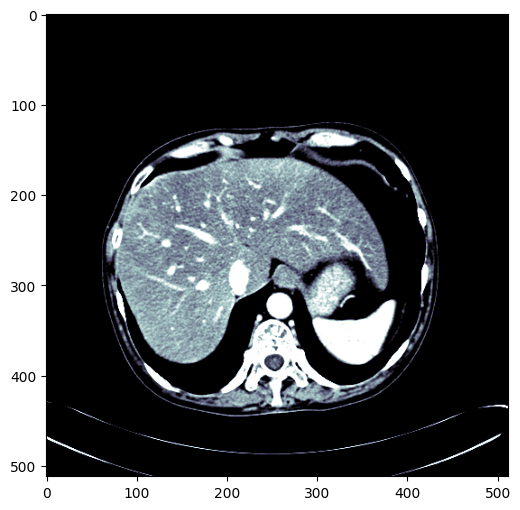

In [6]:
# Preprocess the nii file
#it extends the functionality of PyTorch's
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)
#This decorator is used to add a new method windowed to the Tensor class.
@patch
#The result is a tensor with pixel values scaled between 0 and 1, representing the windowed image.
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

figure(figsize=(8, 6), dpi=100)
#It appears you're applying the liver window settings (dicom_windows.liver) to the slice to visualize the liver tissue in the CT scan
plt.imshow(tensor(sample_ct[..., 55].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [7]:
def plot_sample(array_list, color_map = 'nipy_spectral'):
    '''
    Plots and a slice with all available annotations
    '''
    fig = plt.figure(figsize=(20,16), dpi=100)

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    plt.axis('off')
    #presumably a medical image, converts it to a PyTorch tensor, and applies windowing using the parameters from dicom_windows.liver. It uses the 'bone' color map for visualization, adds a title "Windowed Image", and turns off the axis.
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')
    plt.axis('off')

    plt.show()

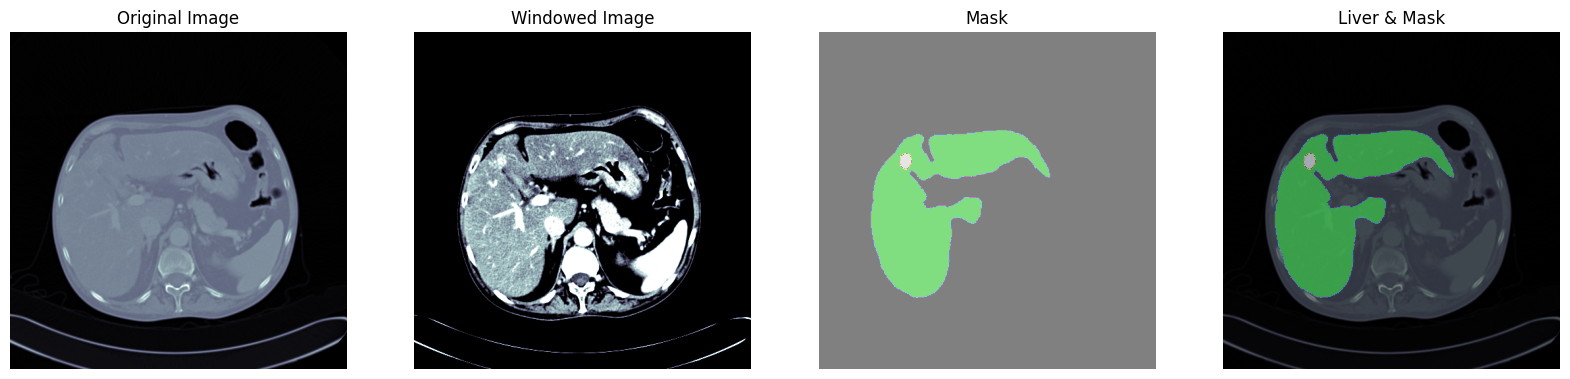

In [8]:
sample = 40

sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[..., sample],
             sample_mask[..., sample]])

## 3.3- Preprocessing Functions

<Axes: >

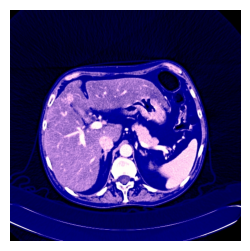

In [9]:
# Preprocessing functions
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'} #a subclass of a PyTorch Tensor designed to handle black-and-white images.

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    "A function to split the range of pixel values into groups, such that each group has around the same number of pixels"
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()

@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)


@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=120): #unction to convert the tensor to a multi-channel image suitable for saving as a JPG.The image is saved with the specified quality.
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs = subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver, dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0], figsize=(8, 6))

## 4- Generate Unet Training Image From 'nii' File

In [10]:
GENERATE_JPG_FILES = True

if GENERATE_JPG_FILES:

    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    ## test folder
    os.makedirs('test_images', exist_ok=True)
    os.makedirs('test_masks', exist_ok=True)

    # Split the data into train and test sets
    train_df, test_df = train_test_split(df_files, test_size=0.1, random_state=42)

    # Check if train_df is empty
    print("Length of train_df:", len(train_df))

    # Reset index for contiguous indices
    train_df = train_df.reset_index(drop=True)
    # Check if test_df is empty
    print("Length of test_df:", len(test_df))
    test_df = test_df.reset_index(drop=True)

    # Loop for training set
    for ii in tqdm(range(len(train_df))):
        curr_ct = read_nii(train_df.loc[ii, 'dirname'] + "/" + train_df.loc[ii, 'filename'])
        curr_mask = read_nii(train_df.loc[ii, 'mask_dirname'] + "/" + train_df.loc[ii, 'mask_filename'])
        curr_file_name = str(train_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

    ### test image save
    for ii in tqdm(range(len(test_df))):
        curr_ct = read_nii(test_df.loc[ii, 'dirname'] + "/" + test_df.loc[ii, 'filename'])
        curr_mask = read_nii(test_df.loc[ii, 'mask_dirname'] + "/" + test_df.loc[ii, 'mask_filename'])
        curr_file_name = str(test_df.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]

        for curr_slice in range(0, curr_dim, 2):
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"test_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"test_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

else:
    path = Path("../input/liver-segmentation-with-fastai-v2")  # read jpg from saved kernel output

Length of train_df: 45
Length of test_df: 6


  0%|          | 0/45 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


  0%|          | 0/6 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


## 4.1- Show Data

In [11]:
print("\nFirst few rows of Training Set:")
print(train_df.head())

print("\nFirst few rows of Testing Set:")
print(test_df.head())


First few rows of Training Set:
                                             dirname       filename  \
0  /kaggle/input/liver-tumor-segmentation/volume_pt3  volume-24.nii   
1  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-38.nii   
2  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-11.nii   
3  /kaggle/input/liver-tumor-segmentation/volume_pt4  volume-36.nii   
4  /kaggle/input/liver-tumor-segmentation/volume_pt2  volume-20.nii   

                                           mask_dirname        mask_filename  
0  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-24.nii  
1  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-38.nii  
2  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-11.nii  
3  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-36.nii  
4  /kaggle/input/liver-tumor-segmentation/segmentations  segmentation-20.nii  

First few rows of Testing Set:
                                  

In [12]:
print("\ntrain df data shape:")
print(train_df.shape)


train df data shape:
(45, 4)


In [14]:
print("\ntest df data shape:")
print(test_df.shape)


test df data shape:
(6, 4)


## 5- Resizing Images

In [15]:
# Set the directories
train_images_dir = '/kaggle/working/train_images'
train_masks_dir = '/kaggle/working/train_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(train_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing nd converted to numpy arrays
target_size = (128, 128)
train_images = [np.array(Image.open(os.path.join(train_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks 
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
train_masks = [np.array(Image.open(os.path.join(train_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays  for further processing
train_images = np.array(train_images)
train_masks = np.array(train_masks)

# Normalize images to [0, 1]
train_images =train_images / 255.0

# Reshape masks to include a channel dimension
train_masks =train_masks.reshape((train_masks.shape[0], train_masks.shape[1], train_masks.shape[2], 1))

In [16]:
# Set the directories
test_images_dir = '/kaggle/working/test_images'
test_masks_dir = '/kaggle/working/test_masks'

# Get the list of image file names
all_image_file_names = sorted(os.listdir(test_images_dir))

# Determine the sample size
sample_size = min(9000, len(all_image_file_names))

# Randomly select images
selected_image_file_names = random.sample(all_image_file_names, sample_size)

# Load selected images and masks with resizing
target_size = (128, 128)
test_images = [np.array(Image.open(os.path.join(test_images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
test_masks = [np.array(Image.open(os.path.join(test_masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_masks = np.array(test_masks)

# Normalize images to [0, 1]
test_images =test_images / 255.0

# Reshape masks to include a channel dimension
test_masks =test_masks.reshape((test_masks.shape[0], test_masks.shape[1], test_masks.shape[2], 1))

In [17]:
print(f"Train image ={len(train_images)} Test image={len(test_images)}")
print(f"Train mask ={len(train_masks)}  Test mask={len(test_masks)}")

Train image =8556 Test image=699
Train mask =8556  Test mask=699


## 6- Split Data Train Test and Validation¶

In [18]:
x_valid, x_test, y_valid, y_test = train_test_split(test_images, test_masks, test_size=1/3, random_state=42)

In [19]:
print(f"train image={train_images.shape} and train_masks={train_masks.shape}")
print(f"X valid shape ={x_valid.shape} x_test={x_test.shape}")
print(f"y valid shape ={y_valid.shape}  y_test={y_test.shape}")

train image=(8556, 128, 128, 3) and train_masks=(8556, 128, 128, 1)
X valid shape =(466, 128, 128, 3) x_test=(233, 128, 128, 3)
y valid shape =(466, 128, 128, 1)  y_test=(233, 128, 128, 1)


##  6.1- Display Random Images and Masks

In [21]:
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select 'num_samples' number of indices from the available images.
    sample_indices = random.sample(range(images.shape[0]), num_samples)
    
    # Loop through each sample.
    for i in range(num_samples):
        index = sample_indices[i]  # Get the index of the current sample.
        
        #  Display the image.
        plt.subplot(num_samples, 2, 2 * i + 1)  # Prepare a subplot.
        plt.imshow(images[index])  # Show the image at the selected index.
        plt.title("Image {}".format(index))  # Set the title for the image.
        plt.axis("off")  # Turn off the axis.
        
        #  Display the corresponding mask.
        plt.subplot(num_samples, 2, 2 * i + 2)  # Prepare the next subplot.
        plt.imshow(masks[index].squeeze(), cmap='gray')  # Show the mask with a grayscale colormap.
        plt.title("Mask {}".format(index))  # Set the title for the mask.
        plt.axis("off")  # Turn off the axis.
    
    # Display all the subplots.
    plt.show()

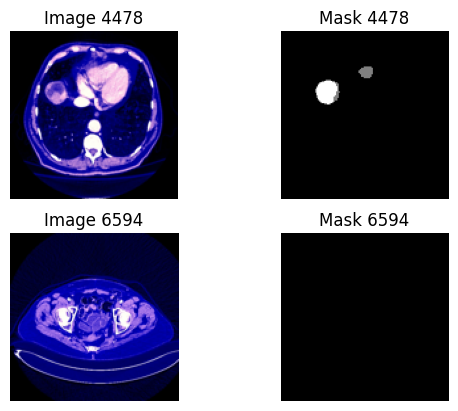

In [22]:
# Display two random images and masks
display_images_and_masks(train_images, train_masks)

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Concatenate, Dropout
from tensorflow.keras.models import Model

def build_efficientnet_unet(input_shape=(128, 128, 3)):
    """
    Build a U-Net style model using EfficientNetB0 as the encoder.
    """
    # Encoder: EfficientNetB0 (pretrained on ImageNet)
    base_model = EfficientNetB0(include_top=False, weights="imagenet", input_shape=input_shape)
    encoder_output = base_model.output

    # Decoder: U-Net style upsampling layers
    skip_connections = [
        base_model.get_layer(name).output
        for name in ["block2a_expand_activation", "block3a_expand_activation", 
                     "block4a_expand_activation", "block6a_expand_activation"]
    ]

    x = encoder_output
    for idx, skip in enumerate(reversed(skip_connections)):
        x = UpSampling2D((2, 2))(x)
        x = Concatenate()([x, skip])
        x = Conv2D(256 // (2 ** idx), (3, 3), activation="relu", padding="same")(x)
        x = Dropout(0.3)(x)

    # Final output layer: Segmentation map
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(1, (1, 1), activation="sigmoid")(x)  # Sigmoid for binary segmentation

    # Build the model
    model = Model(inputs=base_model.input, outputs=x)

    return model

# Instantiate the model
model = build_efficientnet_unet(input_shape=(128, 128, 3))

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Display model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 128, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 128, 128, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 128, 128, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 129, 129, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 64, 64, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 64, 64, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 64, 64, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 64, 64, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 64, 64, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 64, 64, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 9,321,636 (35.56 MB)

 Trainable params: 9,279,613 (35.40 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop if val_loss doesn't improve for 5 consecutive epochs
    restore_best_weights=True,  # Restore weights from the epoch with the best val_loss
    verbose=1            # Print stopping message
)

# Train the model with EarlyStopping
history = model.fit(
    train_images, train_masks,
    validation_data=(x_valid, y_valid),
    epochs= 15,           # Maximum number of epochs
    batch_size=32,
    callbacks=[early_stopping]  # Pass the EarlyStopping callback
)


Epoch 1/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 94ms/step - accuracy: 0.9863 - loss: 0.0255 - val_accuracy: 0.9889 - val_loss: 0.0241
Epoch 2/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9790 - loss: 0.0507 - val_accuracy: 0.9729 - val_loss: 0.0445
Epoch 3/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9755 - loss: 0.0455 - val_accuracy: 0.9729 - val_loss: 0.0365
Epoch 4/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 92ms/step - accuracy: 0.9814 - loss: 0.0359 - val_accuracy: 0.9941 - val_loss: 0.0297
Epoch 5/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9947 - val_loss: 0.0257
Epoch 6/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9915 - loss: 0.0274 - val_accuracy: 0.9951 - val_loss: 0.0230
Epoch 7/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9924 - loss: 0.0244 - val_accuracy: 0.9933 - val_loss: 0.0245
Epoch 8/15
268/268 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - accuracy: 0.9928 - loss: 0.0225 - 

In [29]:
from sklearn.metrics import f1_score
import numpy as np

def calculate_metrics(model, x_train, y_train, x_test, y_test):
    # Predict on training and test data
    train_predictions = (model.predict(x_train) > 0.5).astype(int)
    test_predictions = (model.predict(x_test) > 0.5).astype(int)

    # Flatten masks and predictions for F1 score calculation
    y_train_flat = y_train.flatten()
    train_predictions_flat = train_predictions.flatten()
    y_test_flat = y_test.flatten()
    test_predictions_flat = test_predictions.flatten()

    # Check if data is binary
    if len(np.unique(y_train_flat)) > 2 or len(np.unique(y_test_flat)) > 2:
        average_mode = "weighted"  # For multiclass
    else:
        average_mode = "binary"  # For binary segmentation

    # Calculate F1 scores
    train_f1 = f1_score(y_train_flat, train_predictions_flat, average=average_mode)
    test_f1 = f1_score(y_test_flat, test_predictions_flat, average=average_mode)

    # Calculate accuracies
    train_accuracy = np.mean(train_predictions_flat == y_train_flat)
    test_accuracy = np.mean(test_predictions_flat == y_test_flat)

    print(f"Train Accuracy: {train_accuracy:.4f}, Train F1 Score: {train_f1:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}, Test F1 Score: {test_f1:.4f}")

# Example usage:
calculate_metrics(model, train_images, train_masks, x_test, y_test)


268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Train Accuracy: 0.9952, Train F1 Score: 0.9948
Test Accuracy: 0.9944, Test F1 Score: 0.9944


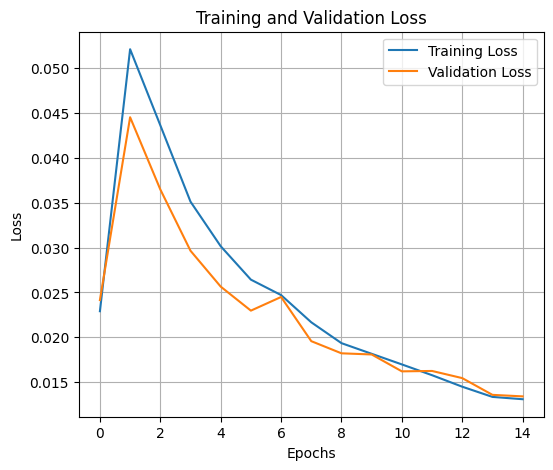

In [36]:
import matplotlib.pyplot as plt

def plot_loss_graph(history):
    """
    Plot training and validation loss from the model's training history.
    """
    # Extract loss and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plot the losses
    plt.figure(figsize=(6,5))
    plt.plot(train_loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Pass the history object from model.fit
plot_loss_graph(history)


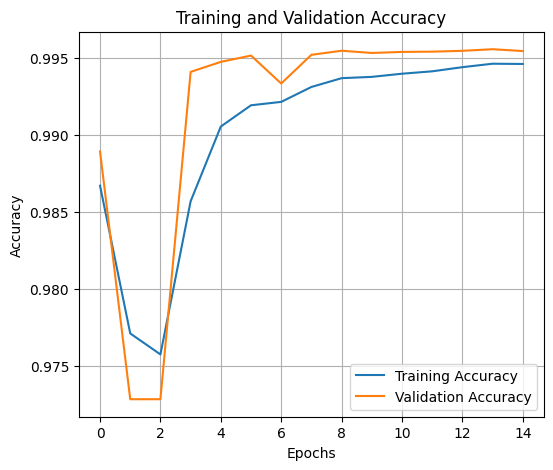

In [35]:
import matplotlib.pyplot as plt

def plot_accuracy_graph(history):
    """
    Plot training and validation accuracy from the model's training history.
    """
    # Extract accuracy and validation accuracy
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Plot the accuracies
    plt.figure(figsize=(6,5))
    plt.plot(train_accuracy, label="Training Accuracy")
    plt.plot(val_accuracy, label="Validation Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Pass the history object from model.fit
plot_accuracy_graph(history)


## 7- Model Training
* ResNet50 Model
* Transfer Learning by ResNet50 Model

In [28]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D

def build_model(input_shape=(128, 128, 3), num_classes=1, weights_path=None):
    # Load the ResNet50 model with the option to load pre-trained weights and excluding the top (fully connected) layers.
    base_model = ResNet50(weights=weights_path, include_top=False, input_tensor=Input(shape=input_shape))

    # Freeze the layers of the base model to prevent them from being updated during training.
    for layer in base_model.layers:
        layer.trainable = False

    # Start building the custom layers on top of the base model's output.
    x = base_model.output

    # Begin upsampling and adding convolutional layers to build the segmentation head.
    x = UpSampling2D((2, 2))(x)  # Upsample the feature map to increase its spatial dimensions.
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)  # Add a convolutional layer with 512 filters.
    x = UpSampling2D((2, 2))(x)  # Continue upsampling.
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)  # Add another convolutional layer with 256 filters.
    x = UpSampling2D((2, 2))(x)  # And so on...
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)

    # Add the final convolutional layer with a filter for each class (in this case, binary, so only 1 filter).
    x = Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Create the model object by specifying the inputs and outputs.
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model with an optimizer, loss function, and metrics to monitor.
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Return the compiled model.
    return model

In [29]:
#calling the build_model function to create a new model based on the ResNet50 architecture
model = build_model(weights_path='/kaggle/input/resnet50/resnet50_weights.h5')

In [30]:
# Train the model using the training data.
# 'train_images' are the input images for training.
# 'train_masks' are the corresponding ground truth masks for the input images.
# 'batch_size' is set to 32, meaning the model will update weights after every 32 samples.
# 'epochs' is set to 10, meaning the model will go through the entire dataset 10 times.
# 'validation_data' is a tuple containing the validation dataset and its corresponding masks.
# The model's performance is evaluated on this validation dataset after each epoch.
history = model.fit(train_images, train_masks, batch_size=32, epochs=7, validation_data=(x_valid, y_valid))

Epoch 1/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 69s 174ms/step - accuracy: 0.9585 - loss: 0.1007 - val_accuracy: 0.9847 - val_loss: 0.0369
Epoch 2/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 26s 98ms/step - accuracy: 0.9870 - loss: 0.0301 - val_accuracy: 0.9822 - val_loss: 0.0431
Epoch 3/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - accuracy: 0.9866 - loss: 0.0318 - val_accuracy: 0.9728 - val_loss: 0.0787
Epoch 4/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 28s 103ms/step - accuracy: 0.9806 - loss: 0.0450 - val_accuracy: 0.9851 - val_loss: 0.0399
Epoch 5/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.9861 - loss: 0.0296 - val_accuracy: 0.9836 - val_loss: 0.0424
Epoch 6/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 27s 101ms/step - accuracy: 0.9868 - loss: 0.0343 - val_accuracy: 0.9868 - val_loss: 0.0386
Epoch 7/7
268/268 ━━━━━━━━━━━━━━━━━━━━ 27s 102ms/step - accuracy: 0.9893 - loss: 0.0273 - val_accuracy: 0.9838 - val_loss: 0.0394


## 7.2 - Plot Training & Validation Loss Values

In [31]:
def plot_history(history):
    # Plot the training loss values
    plt.plot(history.history['loss'])
    # Plot the validation loss values
    plt.plot(history.history['val_loss'])
    # Set the title of the plot to 'Model loss'
    plt.title('Model loss')
    # Set the y-axis label of the plot to 'Loss'
    plt.ylabel('Loss')
    # Set the x-axis label of the plot to 'Epoch'
    plt.xlabel('Epoch')
    # Add a legend to the plot with labels 'Train' for training loss and 'Validation' for validation loss
    plt.legend(['Train', 'Validation'], loc='upper left')
    # Display the plot
    plt.show()

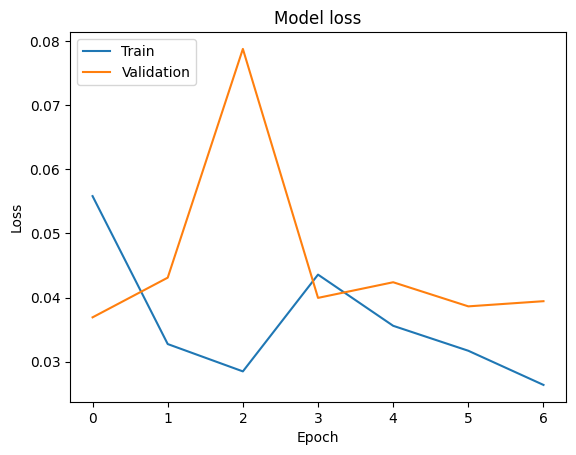

In [32]:
plot_history(history)

## 7.3 - Evaluate, Prediction & Score

In [33]:
# Evaluate the model using the validation dataset.
# 'x_valid' are the input images for validation.
# 'y_valid' are the corresponding ground truth masks for the validation images.
scores = model.evaluate(x_valid, y_valid)

# 'scores' is a list containing the loss as the first element and the accuracy as the second element.
# By accessing 'scores[1]', we retrieve the accuracy of the model on the validation dataset.
accuracy = scores[1]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9827 - loss: 0.0414


In [34]:
prediction = model.predict(x_test)# Use the trained model to make predictions on the test dataset.

# 'x_test' contains the input images for testing.
prediction = model.predict(x_test)

# 'prediction' will contain the output predictions for each input image in 'x_test'.
# For a segmentation model, this would typically be a mask indicating the segmented areas.

8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 902ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [35]:
# Evaluate the model using the test data (x_test, y_test)
test_scores = model.evaluate(x_test, y_test)

# test_scores is a list that contains the loss as the first element and the accuracy as the second element.
# Here, we are accessing the second element, which is the accuracy of the model on the test data.
accuracy = test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9823 - loss: 0.0449


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


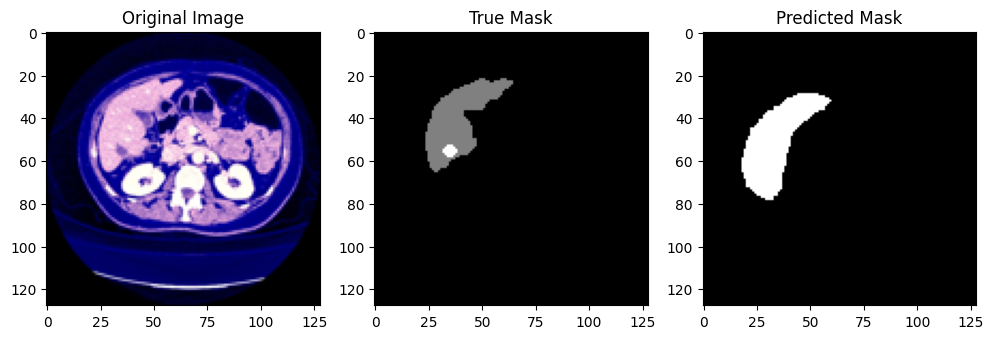

In [36]:
image_index = 44

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.5  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')

# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')

plt.show()

In [37]:
initial_segmentation_results = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


## 8 - U-Net Model

In [38]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the U-Net model architecture with detailed comments
def unet_model(input_layer):
    # Encoder
    # First convolutional block with 64 filters and relu activation, same padding keeps dimensions unchanged
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    # First pooling layer reduces spatial dimensions by half (downsampling)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    # Second convolutional block with 128 filters, following the downsampling
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    # Second pooling layer continues to reduce dimensions
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Decoder
    # Third convolutional block, placed in the decoder part with upsampling coming next
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    # Upsampling layer to increase the spatial dimensions to match those of conv2
    up1 = UpSampling2D((2, 2))(conv3)
    # Concatenation layer merges feature maps from encoder (conv2) with upsampled maps, crucial for U-Net architecture
    concat1 = concatenate([conv2, up1], axis=-1)
    
    # Fourth convolutional block after concatenation to refine features
    conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(concat1)
    # Final upsampling to increase the dimensions to match those of conv1
    up2 = UpSampling2D((2, 2))(conv4)
    # Final concatenation with the very first convolutional layer outputs
    concat2 = concatenate([conv1, up2], axis=-1)
    
    # Output layer with a single filter and sigmoid activation to produce a binary segmentation map
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(concat2)
    
    # Create the model instance with specified inputs and outputs
    model = Model(inputs=input_layer, outputs=outputs)
    return model

# Instantiate the U-Net model specifying the input shape
input_layer = Input(shape=(128, 128, 3), name='input_layer_1')
unet_model = unet_model(input_layer)

# Compile the model specifying optimizer, loss function, and metrics for evaluation
unet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Train the U-Net model on the provided training data, also include validation data for evaluating performance
history1 = unet_model.fit(train_images, train_masks, batch_size=32, epochs= 10, validation_data=(x_valid, y_valid))

Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 34s 94ms/step - accuracy: 0.9531 - loss: 0.2685 - val_accuracy: 0.9855 - val_loss: 0.0384
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9863 - loss: 0.0370 - val_accuracy: 0.9869 - val_loss: 0.0326
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9864 - loss: 0.0344 - val_accuracy: 0.9868 - val_loss: 0.0333
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9876 - loss: 0.0307 - val_accuracy: 0.9867 - val_loss: 0.0328
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 60ms/step - accuracy: 0.9879 - loss: 0.0300 - val_accuracy: 0.9883 - val_loss: 0.0285
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9882 - loss: 0.0284 - val_accuracy: 0.9887 - val_loss: 0.0277
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 16s 61ms/step - accuracy: 0.9886 - loss: 0.0276 - val_accuracy: 0.9890 - val_loss: 0.0266
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.9896 - loss: 0.0251 - 

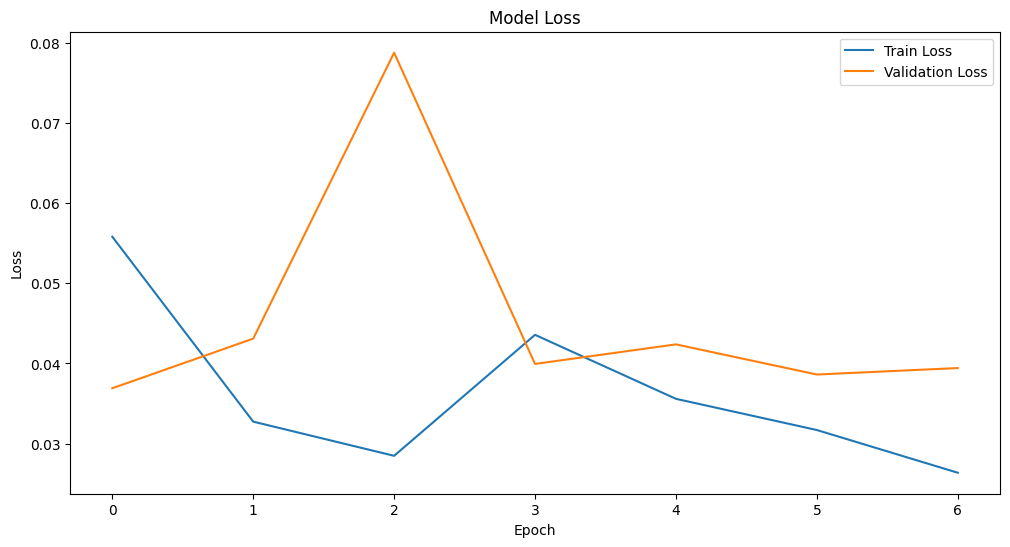

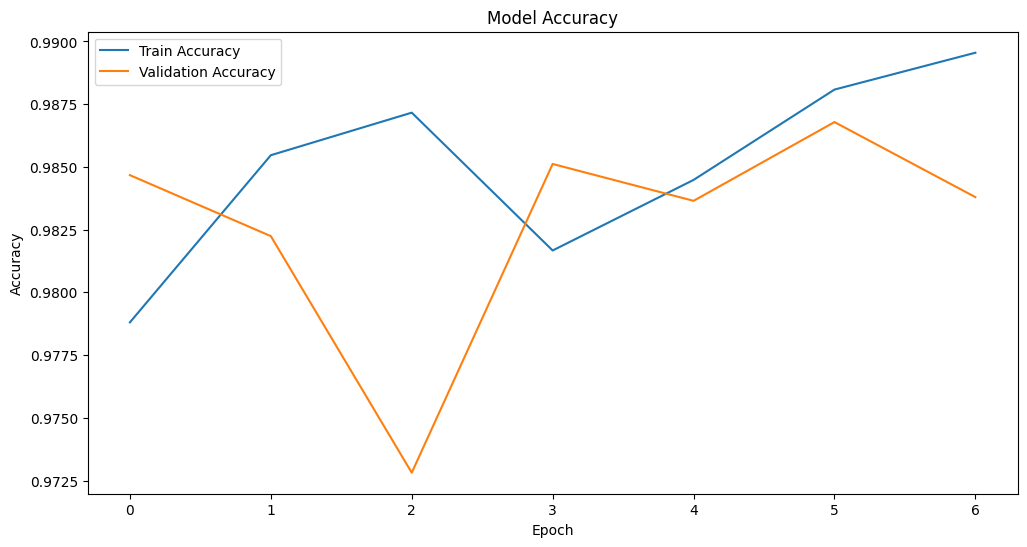

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 8.1 - Evaluate Refined Segmentation Results

In [40]:
# Evaluate the performance of the trained U-Net model on the test dataset
evaluation = unet_model.evaluate(x_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.9887 - loss: 0.0275


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step


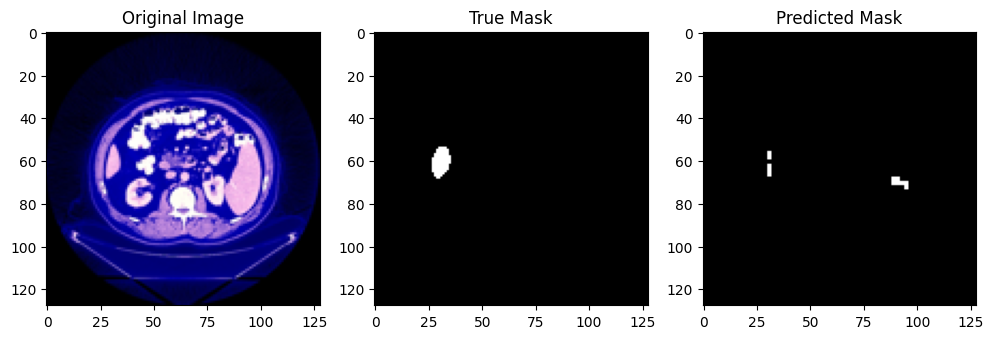

In [41]:
# Import the numpy library for numerical operations and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# Select an index for the image to be visualized and analyzed
image_index = 45

# Load the image and corresponding true mask from the test dataset
input_image = x_test[image_index]  # The input image to the model
true_mask = y_test[image_index]    # The ground truth mask for the input image

# Obtain the predicted mask from the U-Net model
predicted_mask = unet_model.predict(np.expand_dims(input_image, axis=0))[0]  # Model prediction for the input image

# Apply a threshold to convert the predicted mask to a binary mask
threshold = 0.5  
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)  # Binary version of the predicted mask

# Set up the plotting environment with a figure size
plt.figure(figsize=(12, 4))

# Plot the original image in the first subplot
plt.subplot(1, 3, 1)
plt.imshow(input_image)  # Display the original image
plt.title('Original Image')  # Title for the first subplot

# Plot the true mask in the second subplot
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')  # Display the true mask in grayscale
plt.title('True Mask')  # Title for the second subplot

# Plot the predicted binary mask in the third subplot
plt.subplot(1, 3, 3)
plt.imshow(predicted_mask_binary[:, :, 0], cmap='gray')  # Display the binary predicted mask in grayscale
plt.title('Predicted Mask')  # Title for the third subplot

# Display the plots
plt.show()

In [42]:
# Save the entire model to a HDF5 file.
unet_model.save('unet_model.h5')

RESNET NET + 2D UNIT MODEL

In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

def hybrid_resnet_unet(input_shape=(128, 128, 3), num_classes=1):
    """
    Creates a hybrid model using ResNet50 as the encoder and a U-Net as the decoder.
    The output shape will be the same as the input shape (128, 128, 3 for RGB images).
    """
    # Load the pre-trained ResNet50 model as the encoder
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the layers of ResNet50
    base_model.trainable = False

    # Encoder: ResNet50 layers
    encoder_output = base_model.output
    encoder_output = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(encoder_output)
    encoder_output = layers.BatchNormalization()(encoder_output)
    encoder_output = layers.UpSampling2D((2, 2))(encoder_output)

    # Decoder: U-Net like architecture
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(encoder_output)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    # Output layer: Same size as input (128, 128, 3) for RGB input/output
    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(x)

    # Define the model
    model = models.Model(inputs=base_model.input, outputs=outputs)

    return model

# Example usage:
input_shape = (128, 128, 3)  # Input shape for RGB images
hybrid_model = hybrid_resnet_unet(input_shape=input_shape)

# Model summary
hybrid_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 32, 32, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 32, 32, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 32, 32, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 32, 32, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 34,594,689 (131.97 MB)

 Trainable params: 11,005,953 (41.98 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

In [44]:
# Compile the model
hybrid_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = hybrid_model.fit(
    train_images, train_masks,
    batch_size= 16,
    epochs= 12,
    validation_data=(x_valid, y_valid)
)


Epoch 1/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 56s 70ms/step - accuracy: 0.9748 - loss: 0.0639 - val_accuracy: 0.9818 - val_loss: 0.0466
Epoch 2/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9865 - loss: 0.0285 - val_accuracy: 0.9841 - val_loss: 0.0332
Epoch 3/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9858 - loss: 0.0311 - val_accuracy: 0.9842 - val_loss: 0.0390
Epoch 4/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9888 - loss: 0.0263 - val_accuracy: 0.9726 - val_loss: 0.0798
Epoch 5/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9829 - loss: 0.0417 - val_accuracy: 0.9867 - val_loss: 0.0323
Epoch 6/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.9878 - loss: 0.0388 - val_accuracy: 0.9852 - val_loss: 0.0356
Epoch 7/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9895 - loss: 0.0226 - val_accuracy: 0.9868 - val_loss: 0.0341
Epoch 8/12
535/535 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.9883 - loss: 0.0243 - 

In [45]:
import matplotlib.pyplot as plt

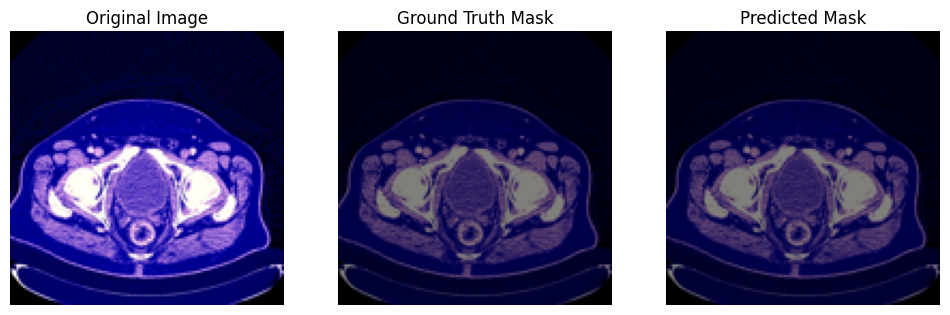

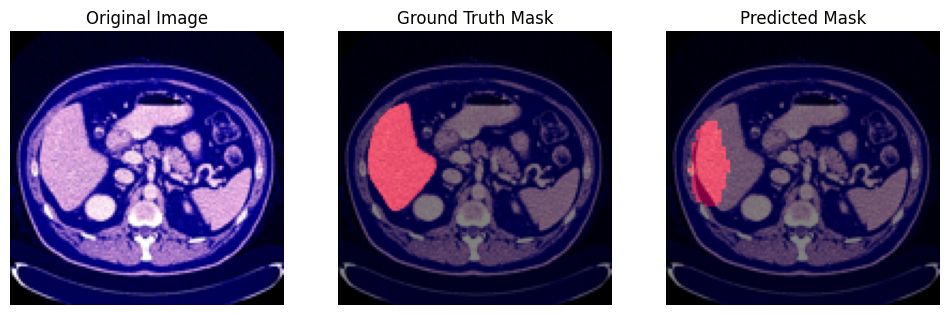

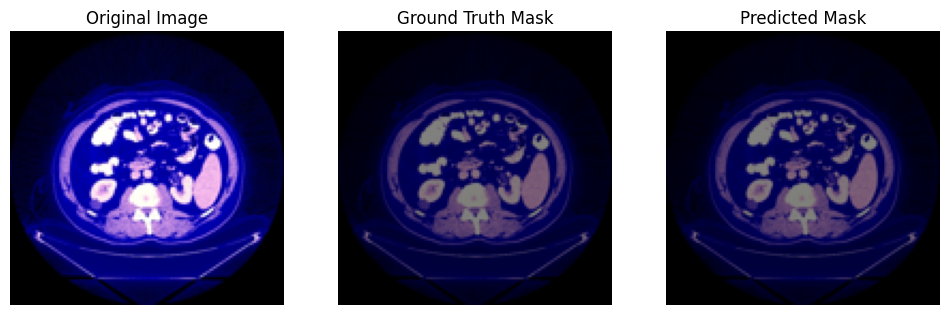

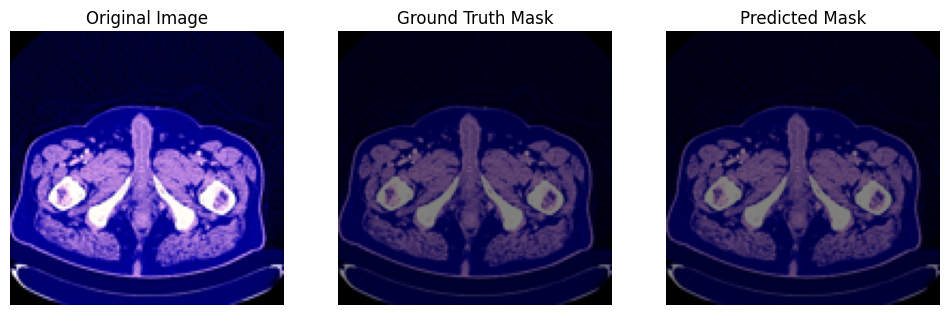

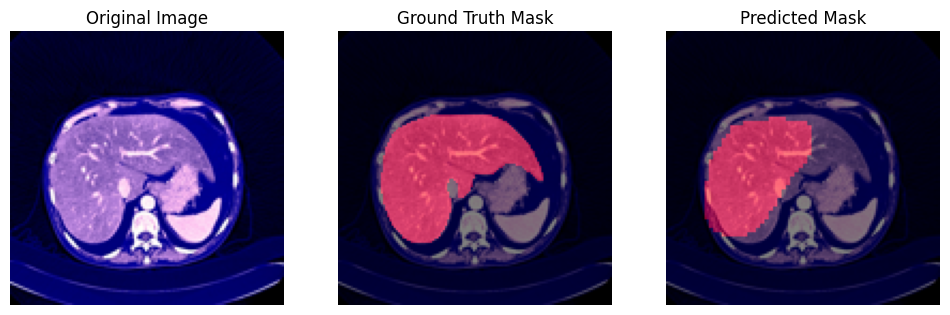

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample_predictions(images, true_masks, pred_masks, num_samples=5):
    """
    Plots sample predictions with color-coded masks.
    Red = Liver regions, Green = Tumor regions.

    Args:
        images: Original test images.
        true_masks: Ground truth masks (single-channel).
        pred_masks: Predicted masks (single-channel).
        num_samples: Number of samples to visualize.
    """
    for i in range(num_samples):
        # Select a random sample
        idx = np.random.randint(0, len(images))
        image = images[idx]
        true_mask = true_masks[idx].squeeze()
        pred_mask = pred_masks[idx].squeeze()
        
        # Create RGB overlays
        overlay_true = np.zeros((*true_mask.shape, 3), dtype=np.uint8)
        overlay_pred = np.zeros((*pred_mask.shape, 3), dtype=np.uint8)
        
        # Assume 1 represents liver and 2 represents tumor in the mask
        overlay_true[..., 0] = (true_mask == 1) * 255  # Red for liver
        overlay_true[..., 1] = (true_mask == 2) * 255  # Green for tumor
        
        overlay_pred[..., 0] = (pred_mask == 1) * 255  # Red for liver
        overlay_pred[..., 1] = (pred_mask == 2) * 255  # Green for tumor
        
        # Display the results
        plt.figure(figsize=(12, 6))
        
        # Original image
        plt.subplot(1, 3, 1)
        plt.title("Original Image")
        plt.imshow(image.squeeze(), cmap="gray")
        plt.axis("off")
        
        # Ground truth mask overlay
        plt.subplot(1, 3, 2)
        plt.title("Ground Truth Mask")
        plt.imshow(image.squeeze(), cmap="gray")
        plt.imshow(overlay_true, alpha=0.5)
        plt.axis("off")
        
        # Predicted mask overlay
        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(image.squeeze(), cmap="gray")
        plt.imshow(overlay_pred, alpha=0.5)
        plt.axis("off")
        
        plt.show()

# Ensure masks are properly labeled (e.g., 1 for liver, 2 for tumor)
# This is for demonstration; replace it with actual label processing if needed.
y_pred_test_bin = (y_pred_test > 0.5).astype(np.uint8)
test_masks_bin = (test_masks > 0.5).astype(np.uint8)

# Call the function
plot_sample_predictions(test_images, test_masks_bin, y_pred_test_bin, num_samples=5)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Sample 1:


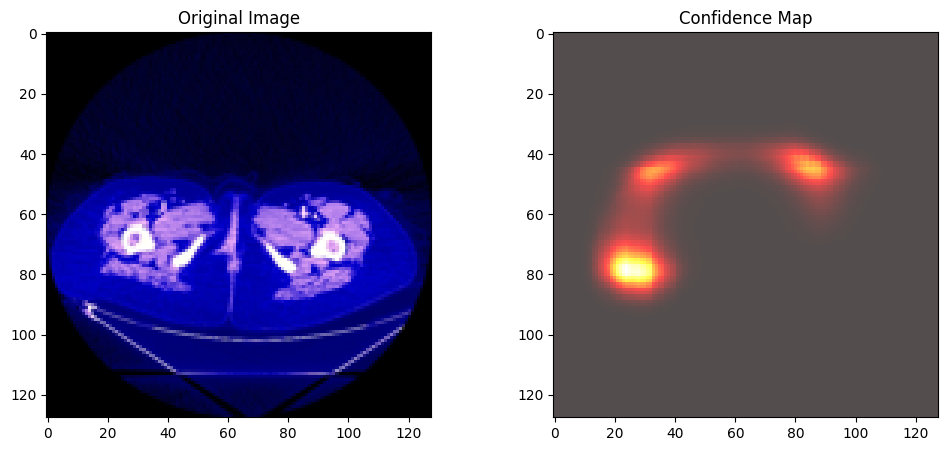

Sample 2:


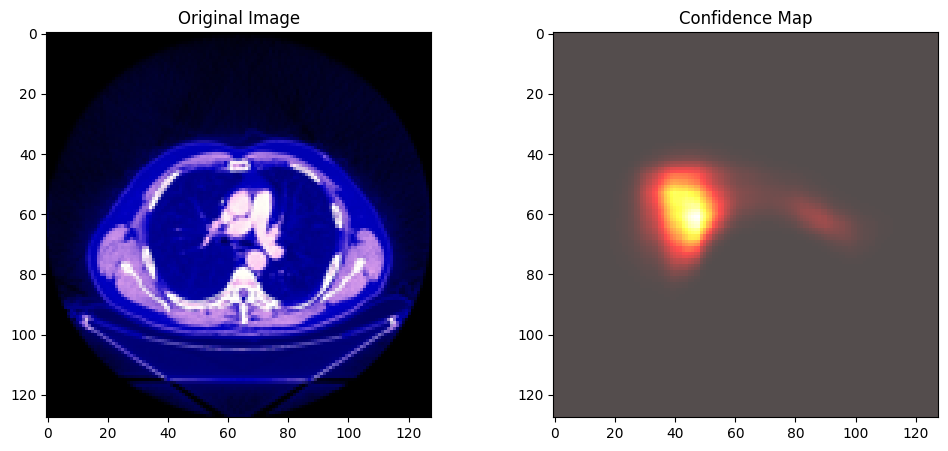

Sample 3:


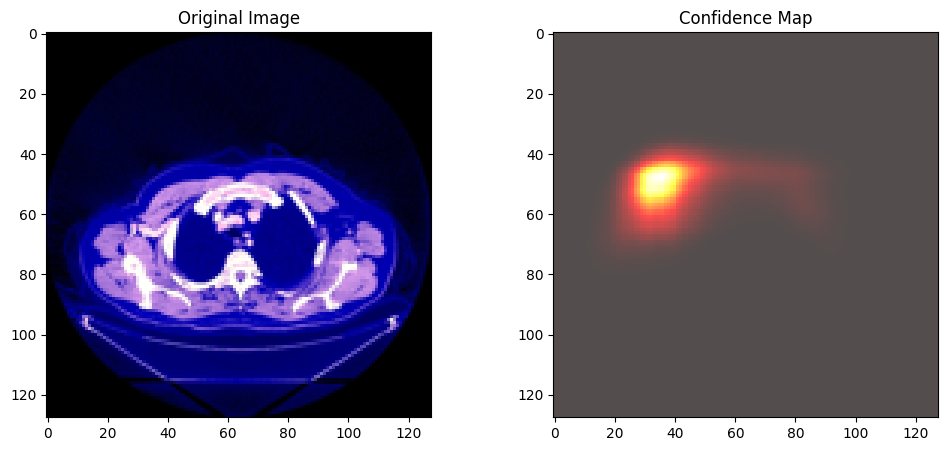

Sample 4:


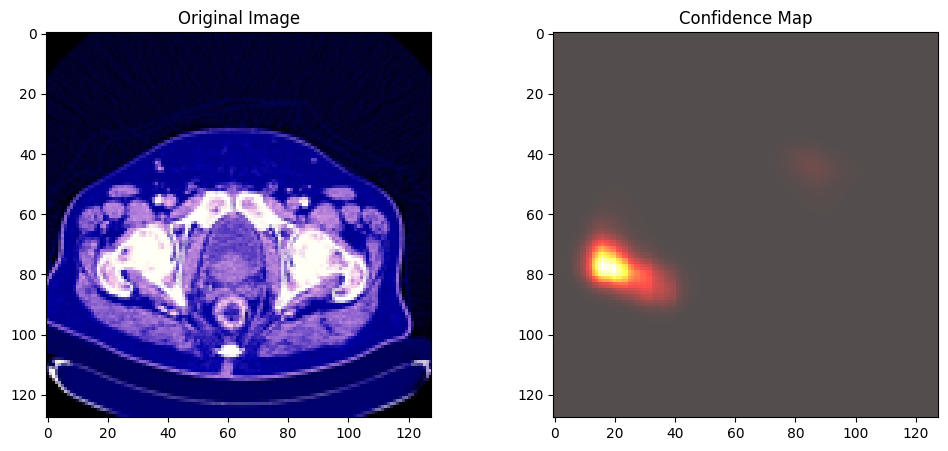

Sample 5:


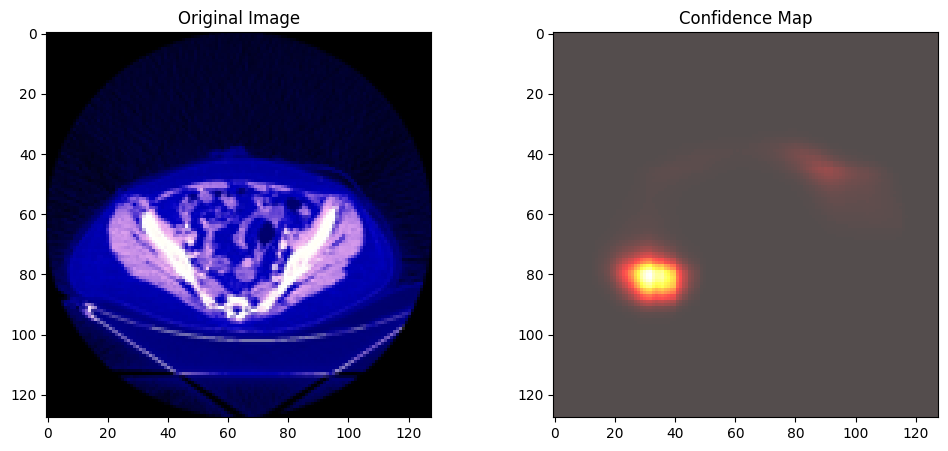

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

def calculate_confidence(model, data):
    """
    Calculate the confidence of the model's predictions.
    Returns the confidence map for each pixel in the image.
    
    Parameters:
    - model: Trained Keras model.
    - data: Input image data (e.g., test images).
    
    Returns:
    - confidence: A tensor containing confidence scores for each pixel.
    """
    # Forward pass to get probabilities (use sigmoid for binary classification)
    output = model.predict(data)
    
    # Apply sigmoid activation to get probabilities (for binary segmentation)
    prob = output  # For binary segmentation (liver vs. tumor)
    
    # Get the confidence as the probability of the predicted class
    confidence = prob  # Confidence level of the predicted class (range: 0 to 1)
    
    return confidence

def visualize_confidence(image, confidence):
    """
    Visualizes the confidence map along with the original image.
    
    Parameters:
    - image: Original input image (e.g., liver CT scan).
    - confidence: Confidence scores for each pixel.
    """
    # Normalize confidence to [0, 1] range for visualization
    confidence_normalized = (confidence - confidence.min()) / (confidence.max() - confidence.min())
    
    # Create a heatmap of the confidence scores
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Show the original image
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    
    # Show the confidence map as a heatmap
    axes[1].imshow(confidence_normalized, cmap='hot', alpha=0.7)
    axes[1].set_title("Confidence Map")
    
    plt.show()

def evaluate_model(model, test_images, test_masks):
    """
    Evaluate the model using test images and test masks, and compute confidence.
    
    Parameters:
    - model: Trained Keras model.
    - test_images: Input test images.
    - test_masks: Ground truth masks for test images.
    """
    # Get predictions for test set
    y_pred_test = model.predict(test_images)  # Replace with your test data

    # Apply thresholding for segmentation masks (e.g., convert predictions to binary)
    y_pred_test_bin = (y_pred_test > 0.5).astype(np.uint8)

    # Calculate the confidence level (output probabilities)
    confidence = calculate_confidence(model, test_images)
    
    # For demonstration, visualize the confidence for a few sample images
    num_samples = 5
    for i in range(num_samples):
        print(f"Sample {i+1}:")
        visualize_confidence(test_images[i], confidence[i])

# Example usage:
# Assume you have a trained model and input data
# model = your_trained_model
# test_images = your_test_images
# test_masks = your_test_masks

# Evaluate the model
evaluate_model(model, test_images, test_masks)


In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

# Dice coefficient function
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6  # Small constant to avoid division by zero
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection + smooth) / (np.sum(y_true) + np.sum(y_pred) + smooth)

# Custom function to calculate metrics
def calculate_metrics(y_true, y_pred):
    y_true = y_true.flatten()  # Flatten arrays to 1D for comparison
    y_pred = y_pred.flatten()
    
    # Dice coefficient
    dice = dice_coefficient(y_true, y_pred)
    
    # F1 Score, Precision, and Recall
    f1 = f1_score(y_true, y_pred, average='macro')  # Change 'average' as needed
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    
    return dice, f1, precision, recall

# Evaluate train accuracy
train_loss, train_accuracy = hybrid_model.evaluate(train_images, train_masks)
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Training Loss: {train_loss:.4f}")

# Evaluate test accuracy
test_loss, test_accuracy = hybrid_model.evaluate(test_images, test_masks)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Get predictions for test set
y_pred_test = hybrid_model.predict(test_images)

# Apply thresholding for segmentation masks (e.g., convert predictions to binary)
y_pred_test_bin = (y_pred_test > 0.5).astype(np.uint8)

# Calculate the metrics
dice, f1, precision, recall = calculate_metrics(test_masks, y_pred_test_bin)

# Print the metrics
print(f"Dice Coefficient: {dice:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


268/268 ━━━━━━━━━━━━━━━━━━━━ 13s 48ms/step - accuracy: 0.9911 - loss: 0.0216
Final Training Accuracy: 0.9910
Final Training Loss: 0.0219
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9869 - loss: 0.0375
Test Accuracy: 0.9866
Test Loss: 0.0381
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dice Coefficient: 0.7431
F1 Score: 0.5759
Precision: 0.6087
Recall: 0.5505


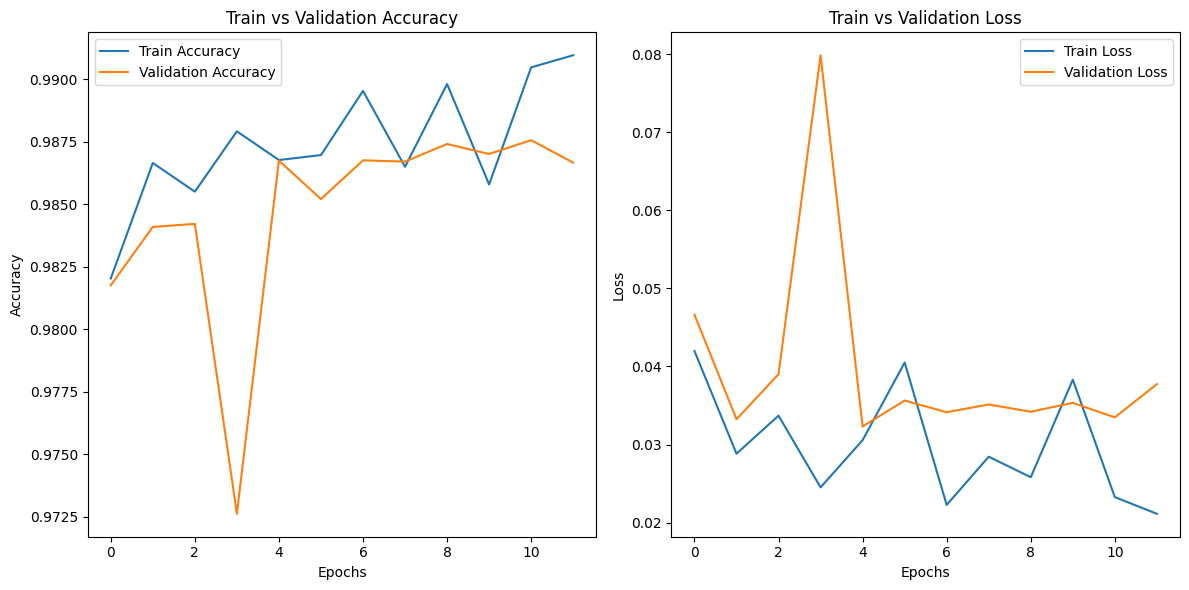

In [50]:
plt.figure(figsize=(12, 6))

# Training accuracy vs Validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss vs Validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()